Лабораторная работа №2 "Классификация с помощью логистической регрессии"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Загрузить данные из файла heart.csv, используя функцию read_csv() библиотеки pandas.  Более подробная информация о датасете https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


2. Проверить сбалансированность выборки (Сколько объектов класса "1" и "0" соответственно). Можно воспользоваться методом value_counts()

In [4]:
count = df.HeartDisease.value_counts(normalize=True)

for i, j in zip(count.index, count):
    print(f"Class {i}: {j}")

Class 1: 0.5533769063180828
Class 0: 0.4466230936819172


3. Выделить качественные признаки, провести их кодирование. Для этого можно воспользоваться фунцией get_dummies() библиотеки pandas

In [5]:
for i in df.columns:
    if "int" not in str(df[i].dtype) and "float" not in str(df[i].dtype):
        df[i] = pd.get_dummies(df[i]).to_numpy().argmax(axis=1)
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


4. Провести нормирование всех количественных признаков. В данном случае, чтобы не изменились значения кодированных качественных признаков можно использовать класс MinMaxScaler(), либо способ из прошлой работы. Отделить входные данные от разметки.

In [6]:
from sklearn.preprocessing import MinMaxScaler

def normalization(X):
    for i in X.columns:
        X[i] = (X[i] - X[i].mean()) / X[i].std()
    return X

X_norm = normalization(df.drop('HeartDisease', axis = 1))
Y = df.HeartDisease
display(X_norm)
display(Y)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,0.515671,0.228907,0.410685,0.824621,-0.551041,0.017245,1.382175,-0.823108,-0.831979,1.051541
1,-0.478223,-1.937107,1.274364,1.490940,-0.171867,-0.551041,0.017245,0.753746,-0.823108,0.105606,-0.595753
2,-1.750404,0.515671,0.228907,-0.129442,0.769768,-0.551041,1.600347,-1.524307,-0.823108,-0.831979,1.051541
3,-0.584238,-1.937107,-0.816550,0.302660,0.138964,-0.551041,0.017245,-1.131539,1.213585,0.574398,-0.595753
4,0.051853,0.515671,1.274364,0.950812,-0.034736,-0.551041,0.017245,-0.581664,-0.823108,-0.831979,1.051541
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902283,0.515671,2.319822,-1.209697,0.596068,-0.551041,0.017245,-0.188897,-0.823108,0.293123,-0.595753
914,1.536064,0.515671,-0.816550,0.626736,-0.053020,1.812770,0.017245,0.164595,-0.823108,2.355810,-0.595753
915,0.369898,0.515671,-0.816550,-0.129442,-0.619830,-0.551041,0.017245,-0.856602,1.213585,0.293123,-0.595753
916,0.369898,-1.937107,0.228907,-0.129442,0.340090,-0.551041,-1.565856,1.460728,-0.823108,-0.831979,-0.595753


0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

5. Разделить выборку на обучающую и тестовую в соотношении 0.6:0.2:0.2, используя функцию train_test_split(). Параметр рандомизации задать random_state = 13 для возможности сравнения результатов. Проверить сбалансированность классов в полученных выборках.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.2, random_state=13)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=13)

for Y_ in [Y_train, Y_val, Y_test]:
    count = Y_.value_counts()
    
    for i, j in zip(count.index, count):
        print(f"Class {i}: {j}")
    print()
    

Class 1: 294
Class 0: 256

Class 1: 113
Class 0: 71

Class 1: 101
Class 0: 83



In [8]:
X_train.shape, X_test.shape

((550, 11), (184, 11))

6. Обучить классификатор на основе логистической регрессии. Использовать класс по вариантам: 1 - LogisticRegression; 2 - SGDClassifier. Процедуру регуляризации не проводить. Рассчитать предсказанные значения классов для тестовой выборки.

In [9]:
from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import LogisticRegression

model = SGDClassifier(max_iter=1000, learning_rate='constant', eta0=0.1, random_state=0, alpha=0, loss='log')
model.fit(X_train, Y_train)
pred_test = model.predict(X_test)


7. Рассчитать точность классификации, в качестве метрики использовать долю верных ответов модели с реальными заначениями.

In [10]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(Y_test, pred_test)
print(f"Test accuracy: {acc_test:.3}")

Test accuracy: 0.837


8. Для заданного в диапазоне $[0, 0.001, 0.01, 0.1, 1.0, 10]$ параметра регуляризации провести процедуру валидации, выбрать оптимальное значение гиперпараметра. Обучить модель при этом значении и рассчитать точность. Для обучения также использовать классы  LogisticRegression или SGDClassifier

In [11]:
lamb = [0, 0.001, 0.01, 0.1, 1.0, 10]

best_model = None
best_acc_val = None
best_lamd = None

for i in range(len(lamb)):
    model = SGDClassifier(max_iter=1000, learning_rate='constant', eta0=0.1,
                          random_state=0, alpha=lamb[i], loss='log')
    model.fit(X_train, Y_train)
    pred_val = model.predict(X_val)
    acc_val = accuracy_score(Y_val, pred_val)
    if best_acc_val is None or acc_val > best_acc_val:
        best_acc_val = acc_val
        best_lamd = lamb[i]
        best_model = model
    print(f"Accuracy for lambda = {lamb[i]}: {acc_val:.3}")
    
print(f"Best lambda is {best_lamd} with val accuracy: {best_acc_val:.3}")

pred_test = best_model.predict(X_test)
acc_test = accuracy_score(Y_test, pred_test)
print(f"Test accuracy: {acc_test:.3}")

Accuracy for lambda = 0: 0.842
Accuracy for lambda = 0.001: 0.87
Accuracy for lambda = 0.01: 0.848
Accuracy for lambda = 0.1: 0.837
Accuracy for lambda = 1.0: 0.842
Accuracy for lambda = 10: 0.685
Best lambda is 0.001 with val accuracy: 0.87
Test accuracy: 0.821


9. Для лучшей модели изобразить матрицу ошибок (confusion matrix)

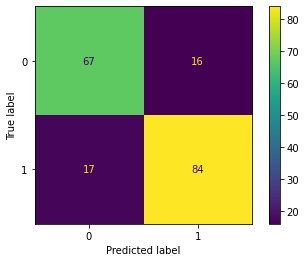

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pred_test)
ConfusionMatrixDisplay(cm).plot()

10. Обучить модель, используя процедуру кросс-валидации с помощью класса LogisticRegressionCV. Предварительно нужно объединить тренировочную и валидационную выборку. Оценить точность модели.

In [13]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV().fit(pd.concat([X_train, X_val]), pd.concat([Y_train, Y_val]))
pred_test = model.predict(X_test)
print(f"Test accuracy: {acc_test:.3}")

Test accuracy: 0.821


11. Для оценки точности построить ROC-кривую. Для этого рассчитать предсказанные вероятности по последней модели. Рассчитать значения оценок FPR и TPR с помощью функции roc_curve().

Test auc: 0.903


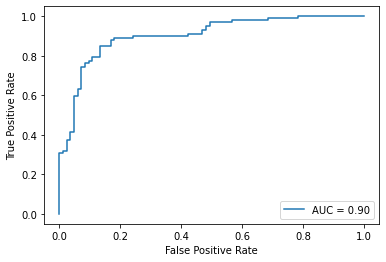

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

probs_test = model.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(Y_test, probs_test)
auc = roc_auc_score(Y_test, probs_test)
print(f"Test auc: {auc:.3}")
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()